In [1]:
# Import libraries
#!pip install opencv-python
import os,cv2
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend as K
K.image_data_format() == 'th'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
import glob

# Data Reading and Labeling

In [2]:
PATH = os.getcwd()
# Define data path
data_path = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset'
 
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=2
no_images=0

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    no_images = no_images+len(img_list)

# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
num_classes = 3
label_index=0
img_data_list=[]
img=0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        if dataset[0]==  'A':
            labels[label_index]=  0
            #print(dataset[0])
        if dataset[0] == 'D':
            labels[label_index] = 1
            #print(dataset[0])
        if dataset[0] == 'N':
            labels[label_index] = 2
        label_index = label_index+1
            #print(dataset[0])


Loaded the images of dataset-AMD1

Loaded the images of dataset-AMD10

Loaded the images of dataset-AMD11

Loaded the images of dataset-AMD12

Loaded the images of dataset-AMD13

Loaded the images of dataset-AMD14

Loaded the images of dataset-AMD15

Loaded the images of dataset-AMD2

Loaded the images of dataset-AMD3

Loaded the images of dataset-AMD4

Loaded the images of dataset-AMD5

Loaded the images of dataset-AMD6

Loaded the images of dataset-AMD7

Loaded the images of dataset-AMD8

Loaded the images of dataset-AMD9

Loaded the images of dataset-DME1

Loaded the images of dataset-DME10

Loaded the images of dataset-DME11

Loaded the images of dataset-DME12

Loaded the images of dataset-DME13

Loaded the images of dataset-DME14

Loaded the images of dataset-DME15

Loaded the images of dataset-DME2

Loaded the images of dataset-DME3

Loaded the images of dataset-DME4

Loaded the images of dataset-DME5

Loaded the images of dataset-DME6

Loaded the images of dataset-DME7

Loaded t

# Preprocessing steps

In [11]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)


# Using 'th' for the image_dim_ordering we get accuracy >=0.99 . 
# Using 'tf' for the dim order I get accuracy >= 0.9 but on more epochs
if num_channel==1:
    if K.image_data_format()=='th':
        img_data= np.expand_dims(img_data, axis=1)
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=-1)
        print (img_data.shape)

else:
    if K.image_data_format()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)


        labels[0:722] = 0
        labels[723:1823] = 1
        labels[1824:3231] = 2
        
 #---->

USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
    # using sklearn for preprocessing
    from sklearn import preprocessing

    def image_to_feature_vector(image, size=(128, 128)):
        # resize the image to a fixed size, then flatten the image into
        # a list of raw pixel intensities
        return cv2.resize(image, size).flatten()

    img_data_list=[]
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_flatten=image_to_feature_vector(input_img,(128,128))
            img_data_list.append(input_img_flatten)

    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    print (img_data.shape)
    img_data_scaled = preprocessing.scale(img_data)
    print (img_data_scaled.shape)

    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)

    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)


    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)

    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
    img_data=img_data_scaled
    
    #%%
labels[0:1000]
#%%



(3231, 128, 128)
(3231, 128, 128, 1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
# Assigning Labels

# Define the number of classes

from tensorflow.keras.utils import to_categorical

num_classes = 3

names = ['AMD','DME','NORMAL']

# convert class labels to on-hot encoding
Y = to_categorical(labels, num_classes)

#Shuffle the dataset with random state=2
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [5]:
X_test.shape

(647, 128, 128, 1)

In [6]:
X_train.shape

(2584, 128, 128, 1)

In [7]:
print(Y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Define the model 

In [8]:
# Defining the model 
# Feel free to use CNNs/Dense Networks
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
#from keras.layers.normalization import LayerNormalization
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.AveragePooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.AveragePooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

# Viewing model_configuration
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 64)        0

In [9]:
learning_rate = 0.0001
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])

Epoch 1/60
65/65 - 55s - loss: 1.5625 - acc: 0.5002 - val_loss: 1.5966 - val_acc: 0.4197
Epoch 2/60
65/65 - 65s - loss: 1.1612 - acc: 0.6701 - val_loss: 1.7625 - val_acc: 0.1915
Epoch 3/60
65/65 - 65s - loss: 1.0304 - acc: 0.7455 - val_loss: 2.0267 - val_acc: 0.2224
Epoch 4/60
65/65 - 59s - loss: 0.9563 - acc: 0.7847 - val_loss: 1.8706 - val_acc: 0.2089
Epoch 5/60
65/65 - 57s - loss: 0.9106 - acc: 0.8070 - val_loss: 1.9090 - val_acc: 0.2456
Epoch 6/60
65/65 - 57s - loss: 0.8279 - acc: 0.8621 - val_loss: 1.6518 - val_acc: 0.3810
Epoch 7/60
65/65 - 57s - loss: 0.7862 - acc: 0.8858 - val_loss: 1.2813 - val_acc: 0.6132
Epoch 8/60
65/65 - 61s - loss: 0.7604 - acc: 0.8999 - val_loss: 0.8908 - val_acc: 0.8240
Epoch 9/60
65/65 - 65s - loss: 0.7404 - acc: 0.9042 - val_loss: 0.6763 - val_acc: 0.9516
Epoch 10/60
65/65 - 60s - loss: 0.7110 - acc: 0.9173 - val_loss: 0.5835 - val_acc: 0.9807
Epoch 11/60
65/65 - 60s - loss: 0.7023 - acc: 0.9236 - val_loss: 0.6185 - val_acc: 0.9574
Epoch 12/60
65/65 -

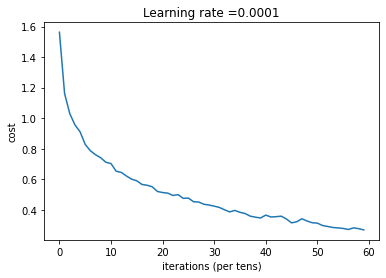



Accuracy on training set is 0.9927431344985962
Saved model to disk
Loaded model from disk


In [10]:
# Train and fit wit appropiate batch size, epochs, verbose = 1 and validation set

no_epochs = 60
batch_size = 32

history = model.fit(X_train, y_train,
            batch_size = batch_size,
            epochs = no_epochs,
            verbose= 2,
            validation_split = 0.2)
    
plt.plot(np.squeeze(history.history["loss"]))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
    
print("\n\nAccuracy on training set is {}".format(history.history["acc"][-1]))


# model saving 
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# Save the model in hdf5 file
model.save("saved_models/AMD_DME_Normal.hdf5")

# Load the saved model
loaded_model= load_model("saved_models/AMD_DME_Normal.hdf5")

In [12]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 5s 260ms/step - loss: 0.2344 - acc: 0.9985
Test Loss: 0.23438884317874908
Test accuracy: 0.9984543919563293


[[4.5263381e-03 6.8400073e-04 9.9478972e-01]
 [2.6742017e-03 1.0654099e-03 9.9626040e-01]
 [4.1729887e-03 1.6703482e-03 9.9415660e-01]
 ...
 [9.8198074e-01 1.6013013e-02 2.0061608e-03]
 [2.4780405e-03 1.5412822e-03 9.9598062e-01]
 [4.0986850e-03 9.3937485e-04 9.9496198e-01]]
[2 2 2 1 0 0 1 1 2 2 2 2 1 2 2 0 1 2 2 2 0 2 0 1 1 1 2 0 1 0 1 2 1 0 0 1 2
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 0 1 0 1 1 2 2 2 2 1 0 1 0 1 1 2 0 2
 0 2 2 0 2 2 0 0 2 1 1 1 0 2 0 2 2 0 1 1 1 1 2 1 2 2 2 2 1 2 2 0 0 1 1 1 0
 0 2 1 2 2 0 0 1 1 1 1 2 1 2 0 1 1 2 2 1 2 2 2 0 0 0 1 2 0 0 2 0 2 1 1 0 0
 1 0 2 2 2 2 1 0 0 2 0 2 0 0 2 1 1 2 2 1 2 2 1 2 1 0 2 2 0 0 2 2 2 1 1 2 1
 1 2 2 1 2 0 1 1 2 0 2 1 2 1 2 0 0 1 2 0 0 2 0 2 1 0 2 2 2 2 0 2 0 1 2 0 2
 2 0 2 2 2 2 2 1 2 1 1 0 1 0 1 2 1 2 1 1 2 2 0 2 1 1 1 1 2 0 0 2 2 1 0 2 0
 0 0 0 0 1 0 1 1 2 1 2 2 1 0 0 2 0 2 0 1 1 2 2 2 1 2 2 2 1 1 1 2 2 2 1 2 2
 0 1 2 1 2 2 2 2 2 2 2 2 2 1 1 1 0 2 1 2 2 2 2 2 1 2 1 1 1 1 2 0 1 2 1 2 1
 2 0 0 0 1 2 0 1 2 1 2 0 2 1 0 0 1 0 1 0 0 1 2 1 

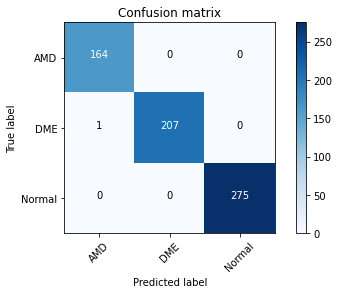

In [13]:
# Predict model on Test Data

Y_pred = model.predict(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred = np.argmax(Y_pred,axis = 1) 
print(y_pred)

target_names = ['AMD', 'DME', 'Normal']
                                        
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()